# <span style='color:SteelBlue'>Valeurs aberrantes : détection et traitement</span>

## <span style='color:red'>Note : pour utilisateurs Google Colab</span>
- Vous devez __indiquer le chemin (path)__ des fichiers .csv, ou des images que nous allons charger dans le notebook.
- Il faudra __importer sur votre drive le dossier Ressource_phase_1__
- Suivez ensuite la procédure indiquée ci-dessous

[vidéo aide youtube](https://www.youtube.com/watch?v=TDyfhlg23vs&t=115s)

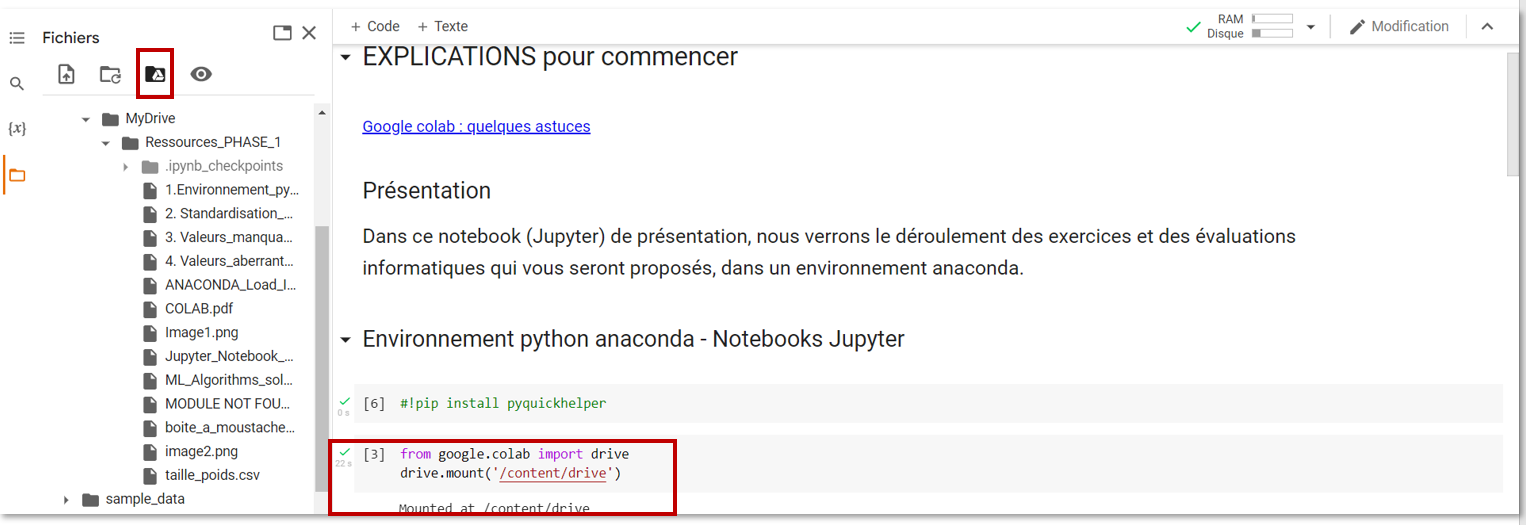

In [7]:
from pyquickhelper.helpgen import NbImage
NbImage("google_colab_load_files3.png")

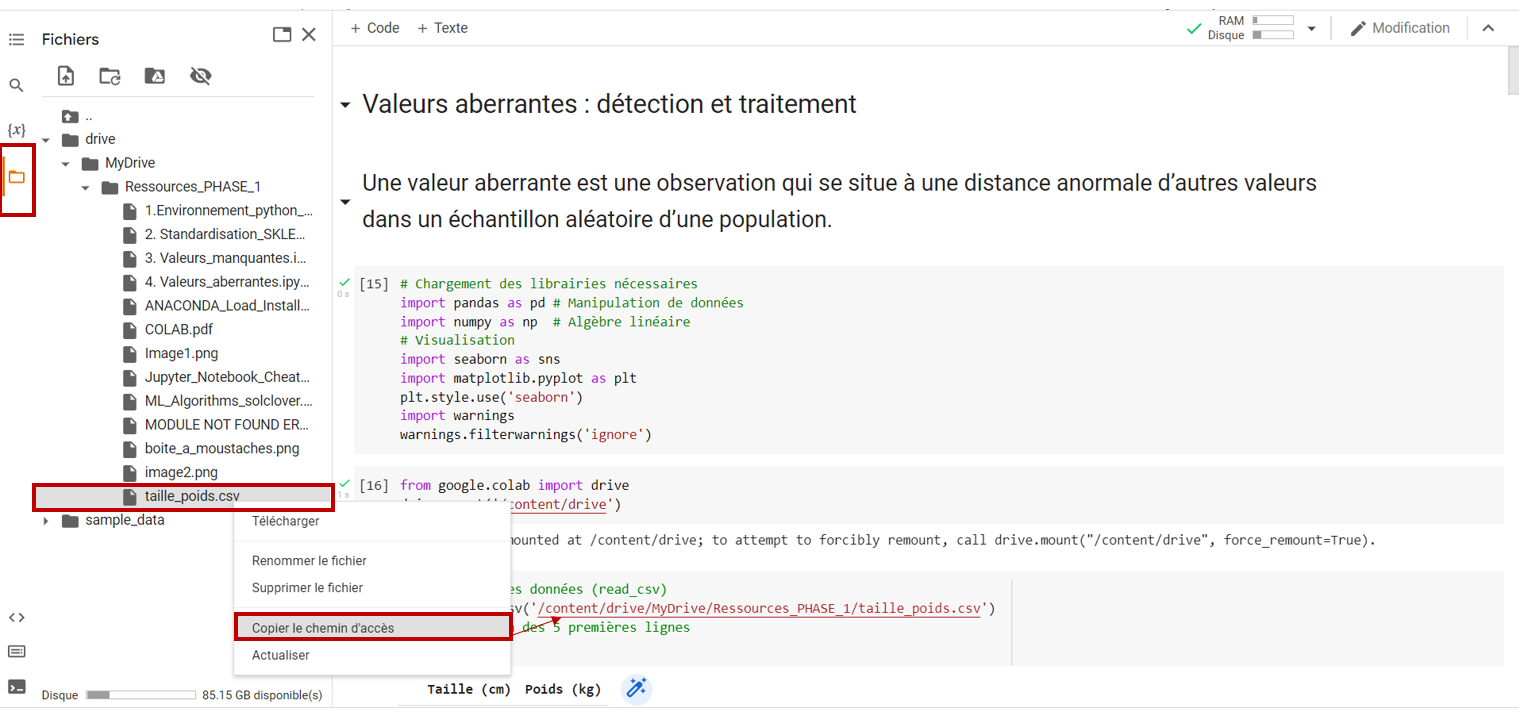

In [6]:
NbImage("google_colab_load_files2.png")

## Une valeur aberrante est une observation qui se situe à une distance anormale d’autres valeurs dans un échantillon aléatoire d’une population.

In [1]:
# Chargement des librairies nécessaires
import pandas as pd # Manipulation de données
import numpy as np  # Algèbre linéaire
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Chargement des données (read_csv)
df = pd.read_csv('taille_poids.csv')
# Visualisation des 5 premières lignes
df.head()

,Taille (cm),Poids (kg)
0,149,46
1,165,64
2,160,59
3,163,58
4,156,58


## <span style='background:GreenYellow'>Détection</span>

## <span style='background:Thistle'>Histogrammes</span> 

> - __Un histogramme__ est un graphique courant permettant de visualiser la distribution d'une variable numérique. 
> - Les données sont représentées en __barres.__
> - La hauteur de chaque barre représente __la fréquence__ des points de données dans chaque groupe.

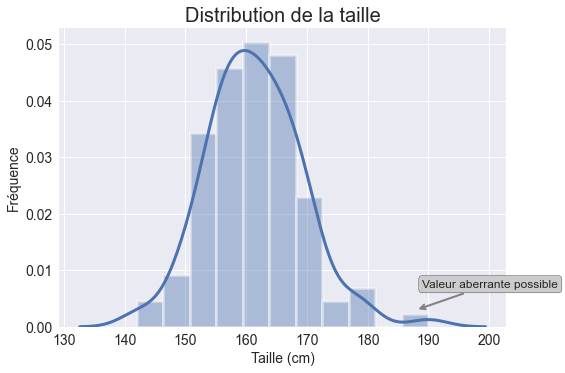

In [49]:
# Histogramme et estimation de la densité de probabilité de la variable taille
ax = sns.distplot(df["Taille (cm)"], hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# Annotation
ax.annotate('Valeur aberrante possible', xy=(188,0.0030), xytext=(189,0.0070), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# Réglages de quelques paramètres du graphique à tracer 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Taille (cm)', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.title('Distribution de la taille', fontsize=20);

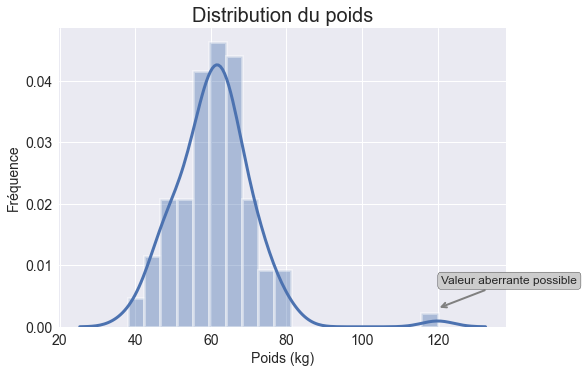

In [57]:
# Histogramme et estimation de la densité de probabilité de la variable poids
ax = sns.distplot(df["Poids (kg)"], hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# Annotation
ax.annotate('Valeur aberrante possible', xy=(120,0.0030), xytext=(121,0.0070), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# Réglages de quelques paramètres du graphique à tracer 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Poids (kg)', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.title('Distribution du poids', fontsize=20);

> Les barres sont affichées sous la forme d'une __courbe en forme de cloche__ qui indique que les deux variables (poids et taille) sont __normalement distribuées__ . 

## <span style='background:Thistle'>Boîte à moustache</span> 

__Les diagrammes en boîte__ montrent le résumé en cinq chiffres d’un ensemble de données : le score minimum, le premier quartile (inférieur), la médiane, le troisième quartile (supérieur) et le score maximum.

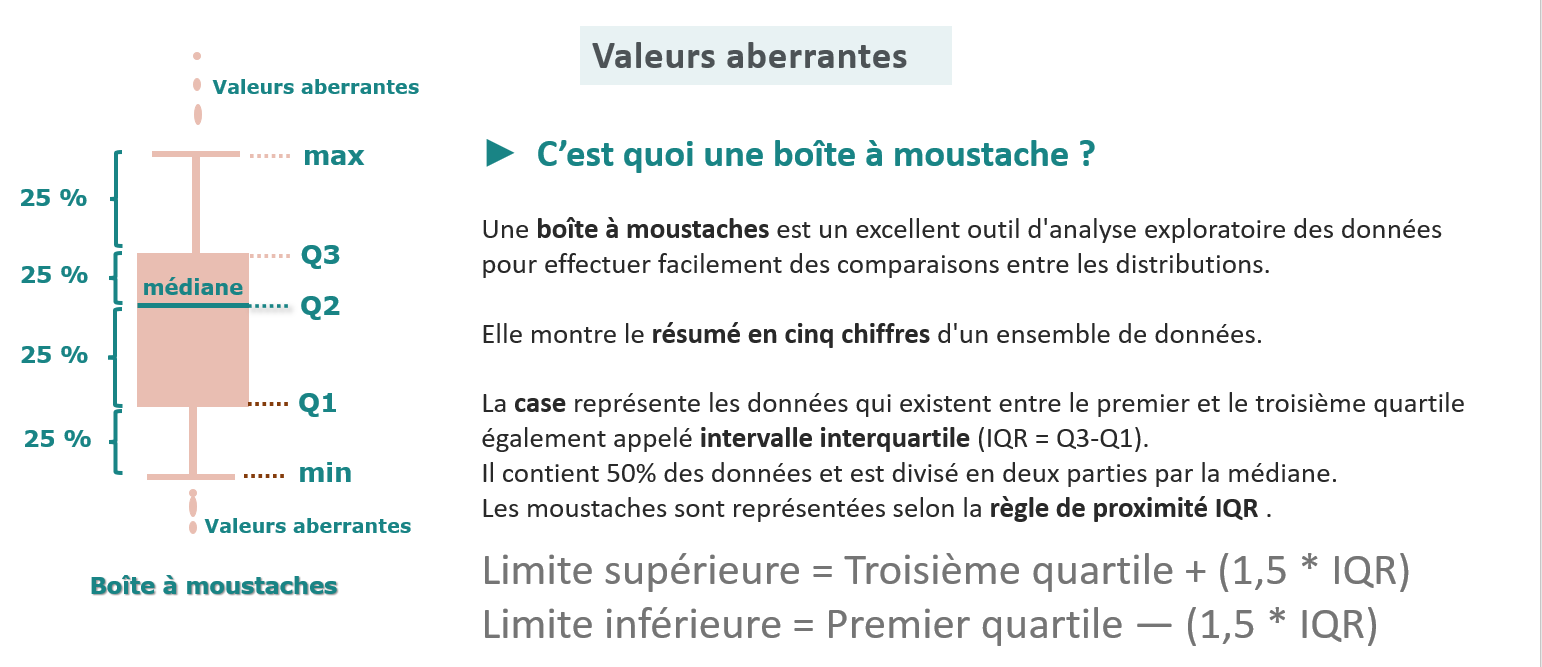

In [3]:
NbImage("boite_a_moustaches.png")

## Les éléments d’un boxplot
__Voici les éléments qui composent un boxplot :__
> - __min__: il s’agit de la valeur la plus basse de l’ensemble de données à l’exclusion des valeurs aberrantes 
> - __médiane__: c’est le point médian de l’ensemble de données. 50% des points de données seront inférieurs à cette valeur et 50% des données seront au-dessus de cette valeur 
> - __premier quartile__: il s’agit du point du 25e centile. Les valeurs de 25% des points de données sont inférieures à cette valeur et 75% supérieures à cette valeur ;
> - __troisième quartile__: c’est le point du 75e centile. Les valeurs de 75% des points de données sont inférieures à cette valeur ;
> - __Intervalle interquartile (IQR)__: ce sont les points compris entre le 25e et le 75e centile ;
> - __Moustaches__: il s’agit des points autres que les 50% du milieu ;
> - __max__: c’est le point de la valeur maximale à l’exclusion des valeurs aberrantes.

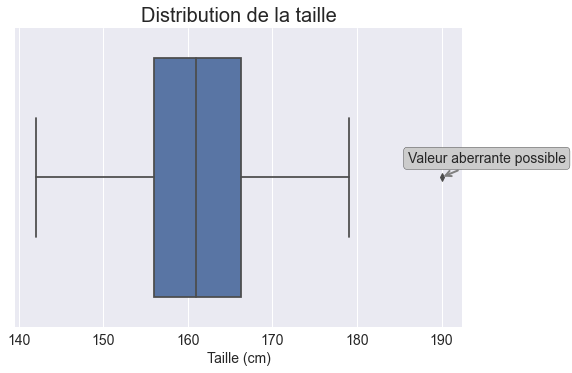

In [64]:
# Boîte à moustache de la variable taille
ax = sns.boxplot(df["Taille (cm)"])

# Annotation
ax.annotate('Valeur aberrante possible', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# Réglages de quelques paramètres du graphique à tracer 
plt.xticks(fontsize=14)
plt.xlabel('Taille (cm)', fontsize=14)
plt.title('Distribution de la taille', fontsize=20)
plt.show()

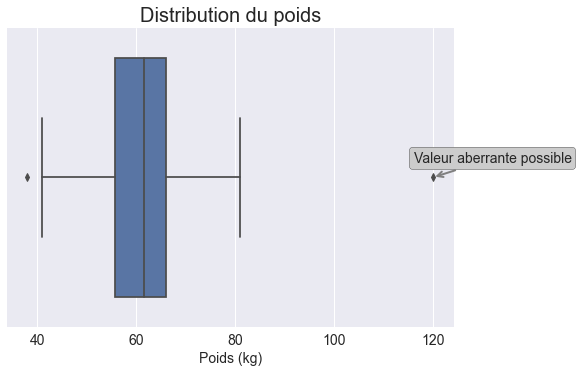

In [61]:
# Boîte à moustache de la variable poids
ax = sns.boxplot(df["Poids (kg)"])

# Annotation
ax.annotate('Valeur aberrante possible', xy=(120,0), xytext=(116,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# Réglages de quelques paramètres du graphique à tracer 
plt.xticks(fontsize=14)
plt.xlabel('Poids (kg)', fontsize=14)
plt.title('Distribution du poids', fontsize=20)
plt.show()

## <span style='background:GreenYellow'>Traitement</span>

## Intervalle interquartile
> - La case représente les données qui existent entre le premier et le troisième quartile également appelé __intervalle interquartile (IQR = Q3-Q1)__. 
> - Il contient 50% des données et est divisé en deux parties par la médiane. 
> - Les moustaches sont représentées selon la règle de proximité IQR .
> - __Limite supérieure__ = Q3 + (1,5 * IQR)
> - __Limite inférieure__ = Q1 — (1,5 * IQR)
### Une valeur est considérée comme une valeur aberrante si elle se situe en dehors de cette plage et est représentée dans une boîte à moustaches par un point .

In [65]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Taille (cm)    10.25
Poids (kg)     10.25
dtype: float64


In [67]:
Limite_sup = Q3 + (1,5 * IQR)
Limite_inf = Q1 - (1,5 * IQR)

In [69]:
# (modified from http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # Premier quartile
    q3 = df_in[col_name].quantile(0.75) # Troisième quartile
    iqr = q3-q1 # Intervalle interquartile 
    minimum  = q1-1.5*iqr # Valeur minimum  
    maximum = q3+1.5*iqr # Valeur maximum 
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

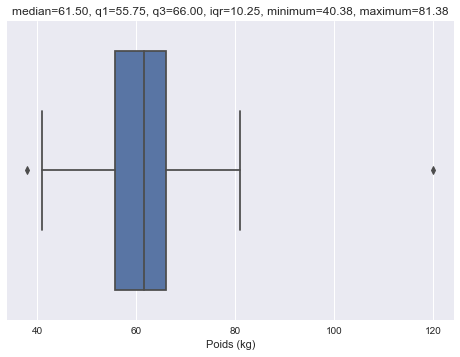

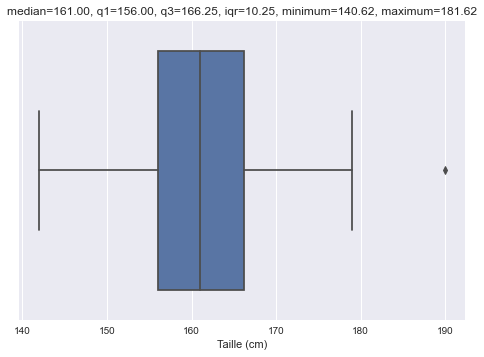

La variable Poids a 2 valeurs aberrantes
La variable Taille a 1 valeur aberrante


In [74]:
# %% Plot the graphs
box_and_whisker(df, "Poids (kg)")
box_and_whisker(df, "Taille (cm)")

_, _, _, _, minimum_Poids_before, maximum_Poids_before = get_iqr_values(df, 'Poids (kg)')

# %% Count the outliers in the original data frame
print(f"La variable Poids a {count_outliers(df, 'Poids (kg)')} valeurs aberrantes")
print(f"La variable Taille a {count_outliers(df, 'Taille (cm)')} valeur aberrante")

Nombre de lignes avant la suppression: 100
Nombre de lignes après la suppression: 98


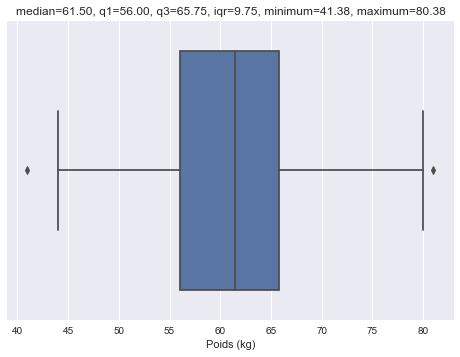

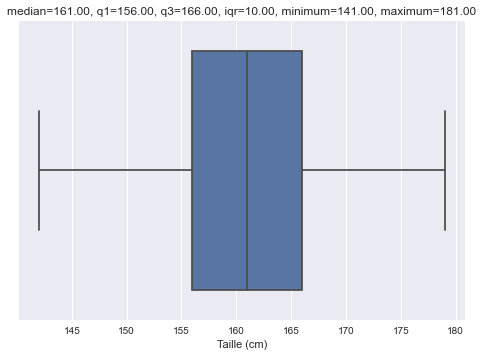

In [75]:
# Supprimer les valeurs aberrantes
print(f"Nombre de lignes avant la suppression: {df.shape[0]}")
df = remove_outliers(df, "Poids (kg)")
df = remove_outliers(df, "Taille (cm)")
print(f"Nombre de lignes après la suppression: {df.shape[0]}")

# Mince, il y a encore des valeurs aberrantes pour le poids! Commence est-ce possible?
box_and_whisker(df, "Poids (kg)")
box_and_whisker(df, "Taille (cm)")

_, _, _, _, minimum_Poids_after, maximum_Poids_after = get_iqr_values(df, 'Poids (kg)')

In [77]:
print(f'Poids min et max avant : {minimum_Poids_before, maximum_Poids_before}')
print(f'Poids min et max après : {minimum_Poids_after, maximum_Poids_after}')

Poids min et max avant : (40.375, 81.375)
Poids min et max après : (41.375, 80.375)


> - La raison pour laquelle la variable poids semble __toujours avoir des valeurs aberrantes__ est que nous avons supprimé les valeurs aberrantes basées sur le minimum et le maximum du DataFrame d'origine avant de le modifier.
> - Une fois les données modifiées, certaines valeurs proches des limites d'origine seront conservées, mais après la modification, __les limites auront changé, laissant certaines valeurs en dehors des nouvelles limites !__ 
> - Nous pouvons soit accepter ce résultat légèrement étrange, soit continuer à supprimer les valeurs aberrantes jusqu'à ce qu'il ne reste plus rien dans le cadre de données mis à jour. 